## Data Visualization with Python 

### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Data

In [10]:
# make a path
path = r'/Users/profkdfischer/Instacart Basket Analysis'

In [11]:
# import the dataframe - use the one with the 4 new columns from Exercise 4.7
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_48.pkl'))

In [12]:
# check the head
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,orders_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_mean,spending_flag,user_frequency,spend_status
0,2539329,1,1,2,8,NaN,True,196,1,0,...,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low Spender,NaN,NaN
1,2398795,1,2,3,7,15.0,False,196,1,1,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low Spender,13.0,Frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low Spender,10.0,Frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.0,Frequent customer


In [14]:
# check the shape
ords_prods_merge.shape

(32404859, 23)

### Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

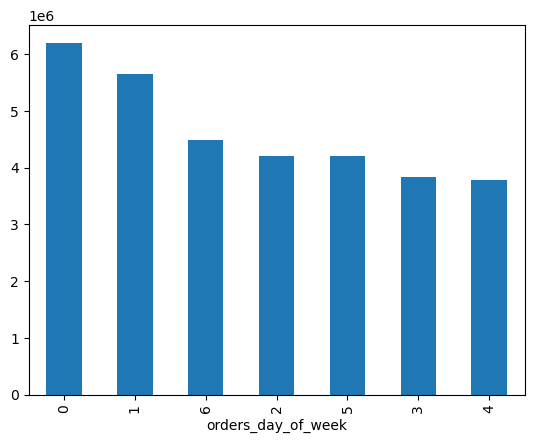

In [15]:
# create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

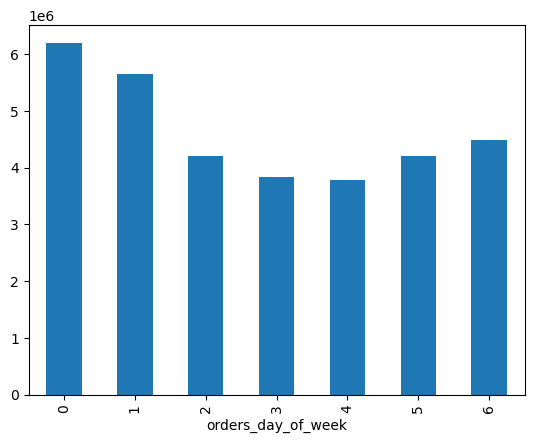

In [16]:
# create a sorted bar chart
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

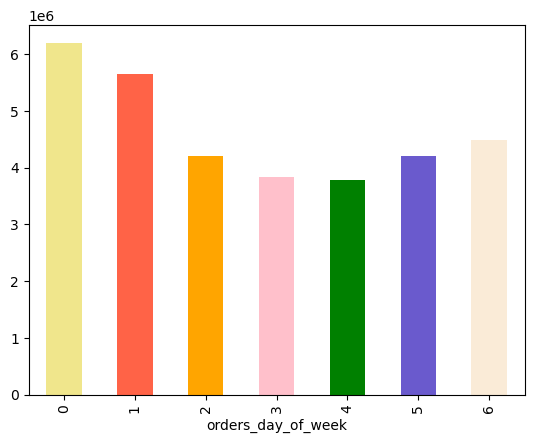

In [27]:
# create a sorted bar chart with colors
colors = ['khaki', 'tomato', 'orange', 'pink', 'green', 'slateblue', 'antiquewhite']
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = colors)

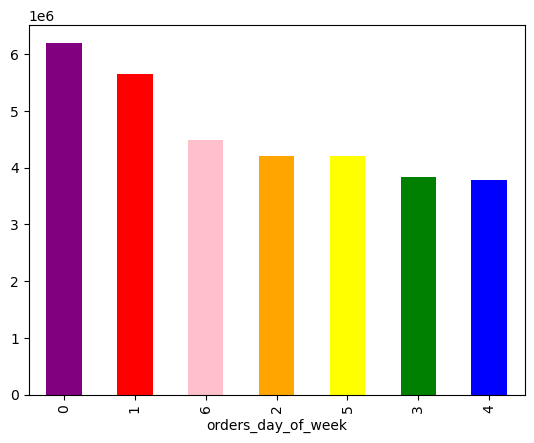

In [29]:
# save the chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [30]:
# export the chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms and Scatterplots

<Axes: ylabel='Frequency'>

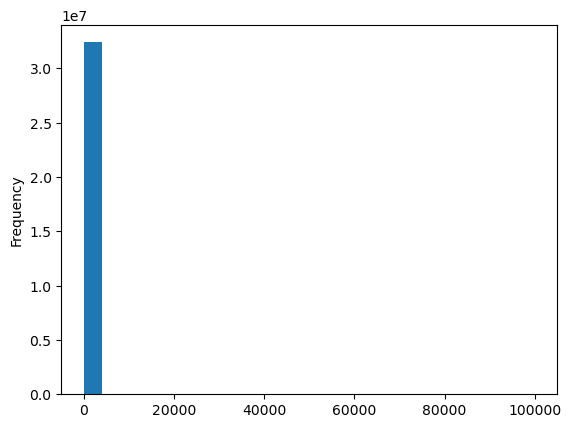

In [31]:
# create a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [32]:
# look at the basic stats
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

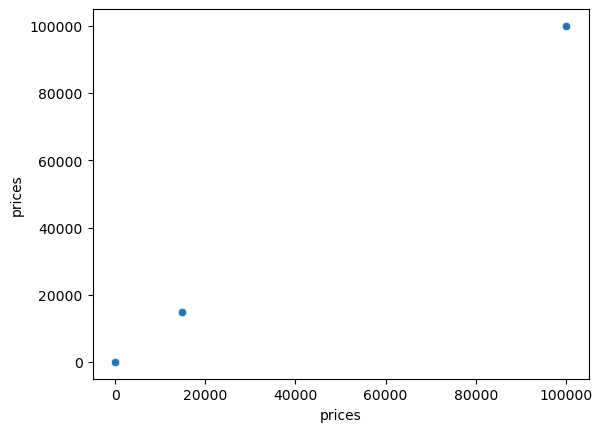

In [33]:
# create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [34]:
# check prices over 10
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,orders_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_mean,spending_flag,user_frequency,spend_status
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,NaN,NaN
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,NaN,NaN
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High Spender,NaN,NaN
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,14900.0,High-range product,Busiest day,Most orders,4,New customer,1154.792308,High Spender,NaN,NaN
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,14900.0,High-range product,Busiest day,Most orders,16,Regular customer,114.426619,High Spender,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,99999.0,High-range product,Busiest day,Most orders,39,Regular customer,1106.743956,High Spender,NaN,NaN
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,99999.0,High-range product,Busiest day,Most orders,39,Regular customer,1106.743956,High Spender,NaN,NaN
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,99999.0,High-range product,Least busy,Most orders,15,Regular customer,451.153540,High Spender,NaN,NaN
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,99999.0,High-range product,Least busy,Average orders,12,Regular customer,1178.381871,High Spender,NaN,NaN


In [35]:
# turn all the crazy high prices into NaNs:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [36]:
# check highest price now
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

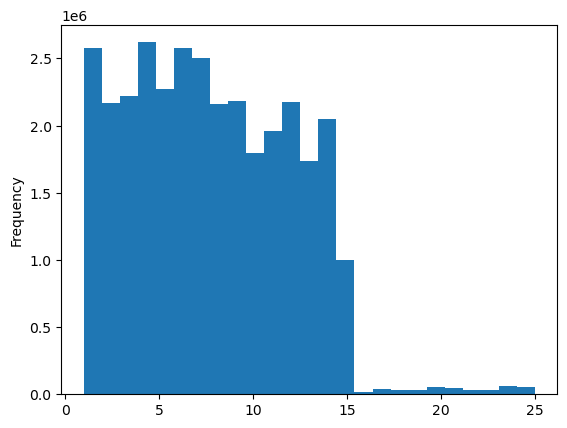

In [37]:
# try the histogram again now
ords_prods_merge['prices'].plot.hist(bins = 25)

### Line Charts

In [38]:
# create a representative sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [41]:
# split the df into a dev set..
big = ords_prods_merge[dev]

In [40]:
# and a training set
small = ords_prods_merge[~dev]

In [42]:
# check it
len(ords_prods_merge)

32404859

In [43]:
len(big) + len(small)

32404859

In [44]:
# create a df with only the columns you need for your chart
df_2 = small[['orders_day_of_week','prices']]

/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/profkdfischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

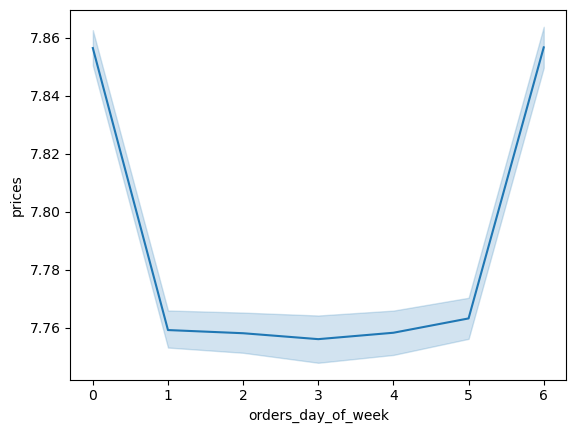

In [45]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')